In [215]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import tight_layout
import matplotlib

In [216]:
def get_delta_time(freq,ref_freq=1382,dm=2.64476):
    delta_t = (dm / 2.41e-4) * (ref_freq**(-2) - freq**(-2)) 
    return delta_t # delta t (s)

def get_delta_nbin(freq,nbin=1024,pfold=0.0057574519367126365):
    delta_t = get_delta_time(freq)
    return (int)((delta_t / pfold) * nbin)  % nbin

In [217]:
# [0:loc] ----> 尾部
def shift_array(data,loc=0):
    data = np.hstack((data[loc:],data[:loc]))
    return data

In [218]:
# data = np.loadtxt("txt/cspfb_20channel_correct.txt")
# data = np.loadtxt("txt/ospfb2x_20channel_correct.txt")
data = np.loadtxt("txt/ospfb43x_20channel_correct.txt")

In [219]:
mydata = data.reshape(-1,1024)
nchan = mydata.shape[0]

In [220]:
cfreq = np.zeros((1024))
bw = 400 / nchan
fc = 1582
for i in range(nchan):
    fc -= bw // 2
    cfreq[i] = fc
    fc -= bw // 2

In [221]:
# 得到每个通道的时延点数
d = np.zeros((nchan),dtype=np.int32)
for i in range(nchan):
    d[i] = get_delta_nbin(cfreq[i])

In [222]:
for i in range(nchan):
    mydata[i][1000:] = mydata[i][1000-24:1000]

In [223]:
pdata = np.zeros((nchan,1024))

In [224]:
for i in range(nchan):
    pdata[i] = shift_array(mydata[i],-d[i])

In [225]:
profile = pdata.sum(axis=0)

In [226]:
# 未进行中心对齐
for i in range (nchan):
    pdata[i] = (pdata[i] - np.min(pdata[i])) / (np.max(pdata[i]) - np.min(pdata[i]))

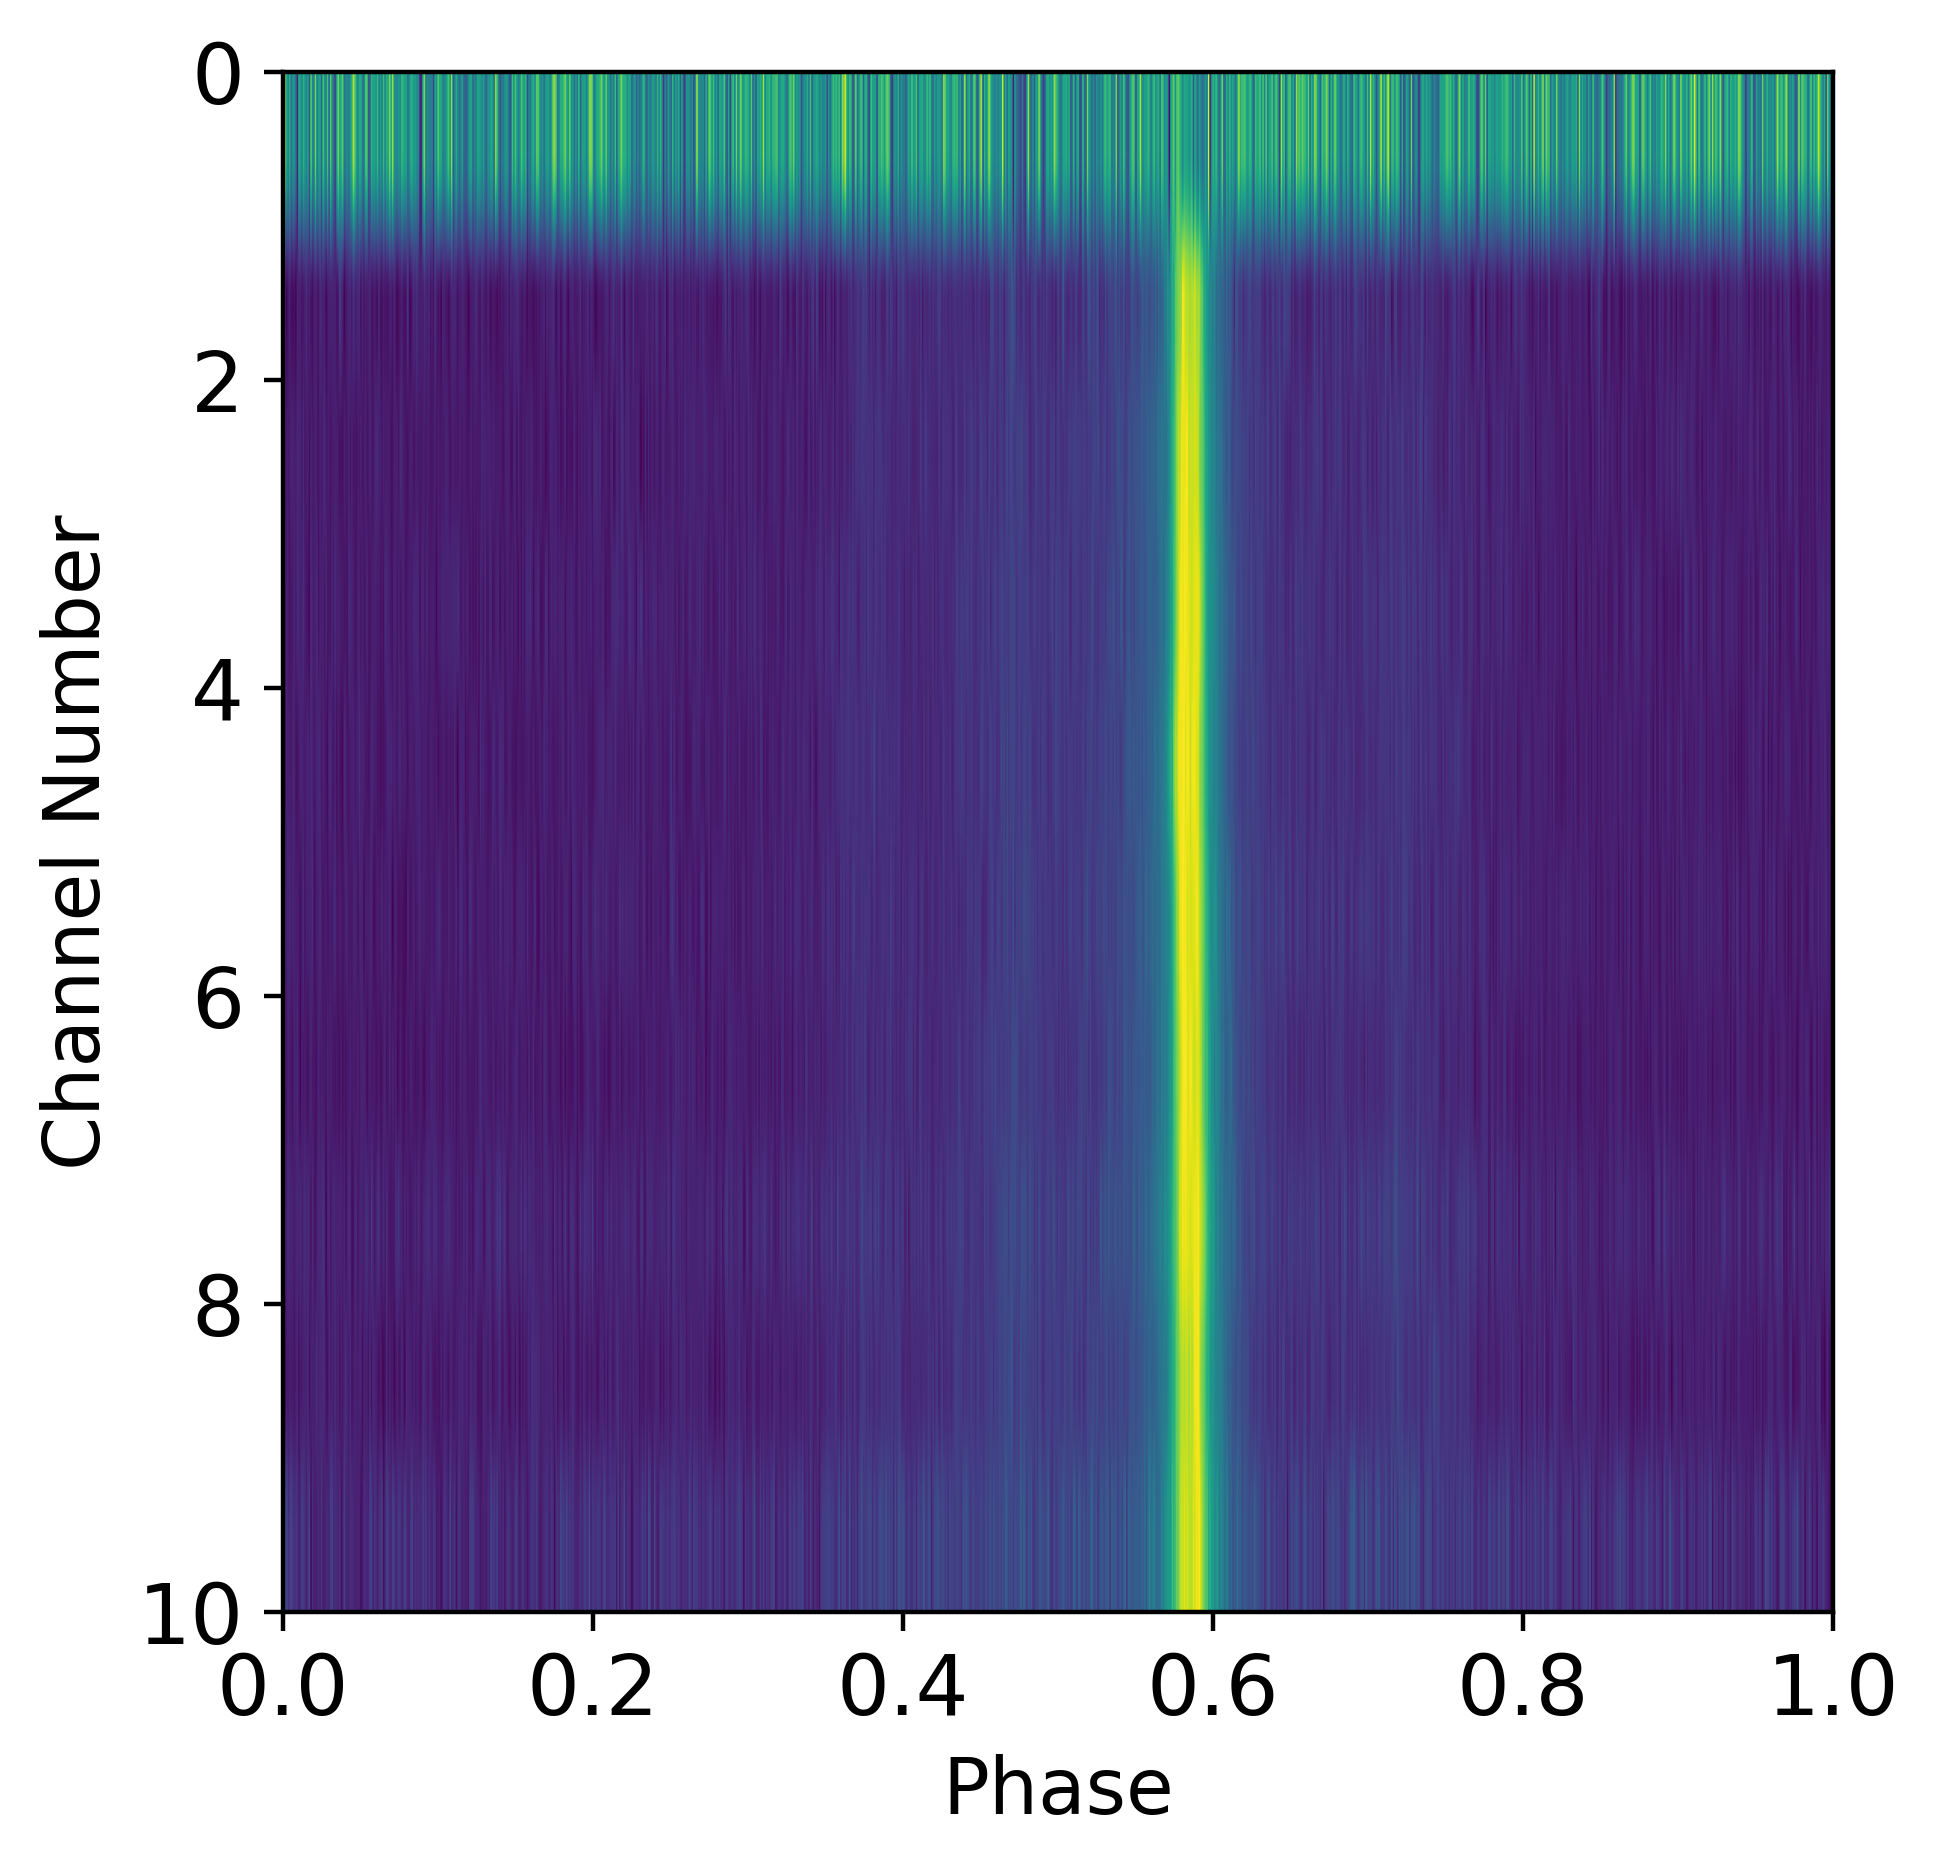

In [227]:
plt.figure(figsize=(5,5),dpi=400) 
plt.xlabel('Phase', size=14)
plt.ylabel('Channel Number', size=14)
plt.imshow(pdata,aspect="auto",extent=[0,1,10,0])
# plt.imshow(pdata,aspect="auto")

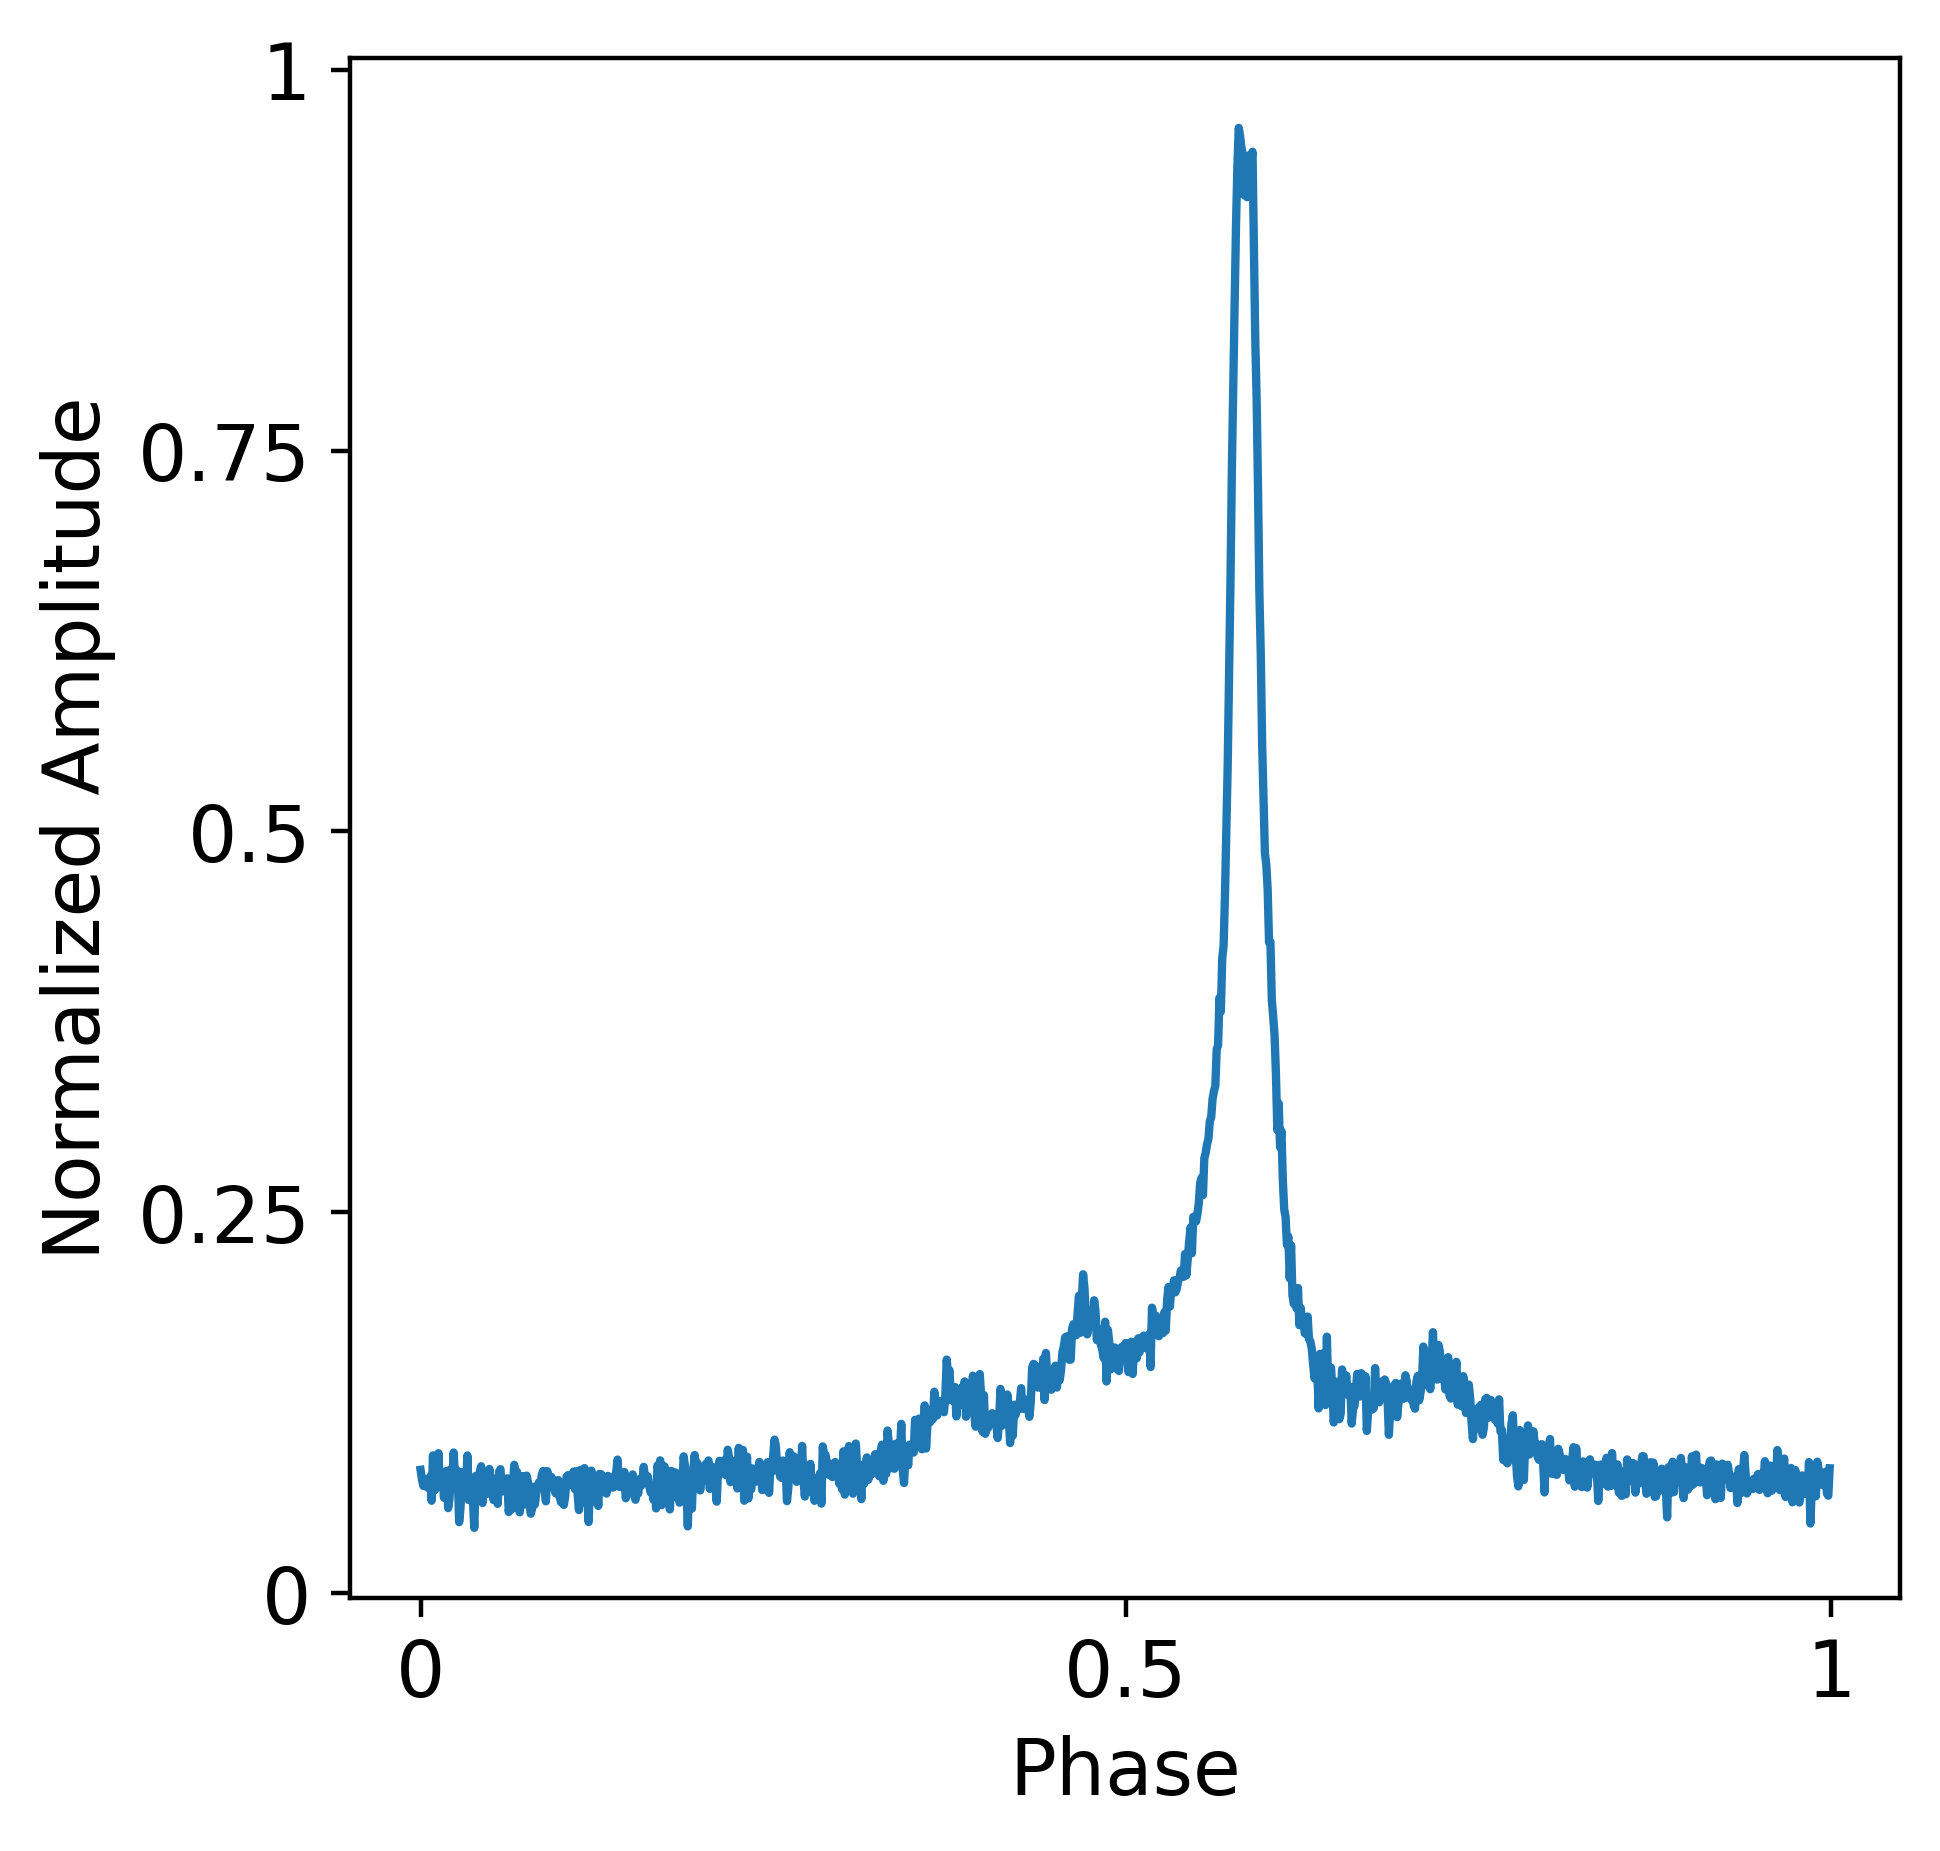

In [228]:
plt.figure(figsize=(5,5),dpi=400) 
plt.xlabel('Phase', size=14)
plt.ylabel('Normalized Amplitude', size=14)
plt.xticks([0,512, 1024], [0,0.5, 1],size=14)
# plt.yticks([3.005,3.025,3.045,3.065,3.085], [0,0.25,0.5,0.75,1],size=14)
# plt.yticks([3.055,3.075,3.095,3.115,3.135], [0,0.25,0.5,0.75,1],size=14)
plt.yticks([3.06,3.08,3.10,3.12,3.14], [0,0.25,0.5,0.75,1],size=14)
plt.plot(profile)
# np.savetxt("txt/ospfb43x_20channel_all_correct.txt",profile)

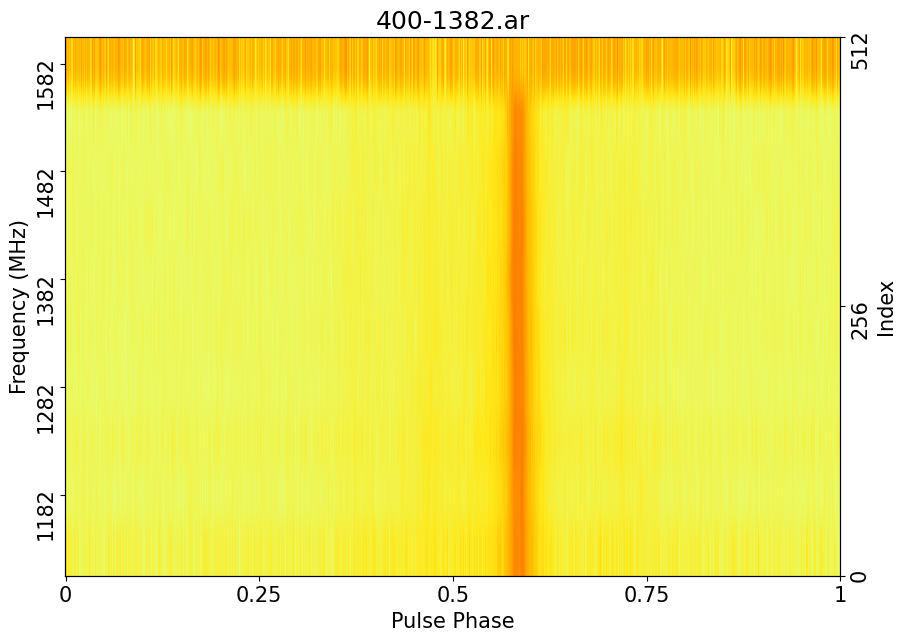

In [229]:
matplotlib.rc('xtick', labelsize = 15)
matplotlib.rc('ytick', labelsize = 15)
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

ax1.imshow(pdata,aspect="auto",cmap=plt.cm.Wistia)
ax1.set_xlabel("Pulse Phase",fontsize=15)
ax1.set_ylabel("Frequency (MHz)",fontsize=15)
ax1.set_yticks([0,2,4,6,8], [1582,1482,1382,1282,1182])
plt.yticks(rotation=-270)


ax2 = ax1.twinx()

ax2.set_ylabel("Index",fontsize=15)
# ax2.set_ylim(0,1024)
ax2.set_yticks([0,512,1024], [0,256,512])
plt.yticks(rotation=-270)
plt.xticks([0,256,512,768,1024], [0,0.25,0.5,0.75,1])

plt.title("400-1382.ar",fontsize=18)

# plt.savefig("img/400.pdf")#,bbox_inches='tight') 
plt.show()